# Image processing

## 5th Assignment - Shahid Beheshti University 

### Outline

- [Question 1](#0)


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import math
import glob
import random
from skimage.feature import hog
from skimage import data, exposure
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from scipy.spatial.distance import euclidean
from scipy.fftpack import dct, idct
import math
import sys

<a name="0"></a>
## Question 1
JPEG Compression

In [4]:
img1 = cv2.imread('dataset/img1.jpg')
img2 = cv2.imread('dataset/img2.jpg')

In [5]:
img2.size

49653792

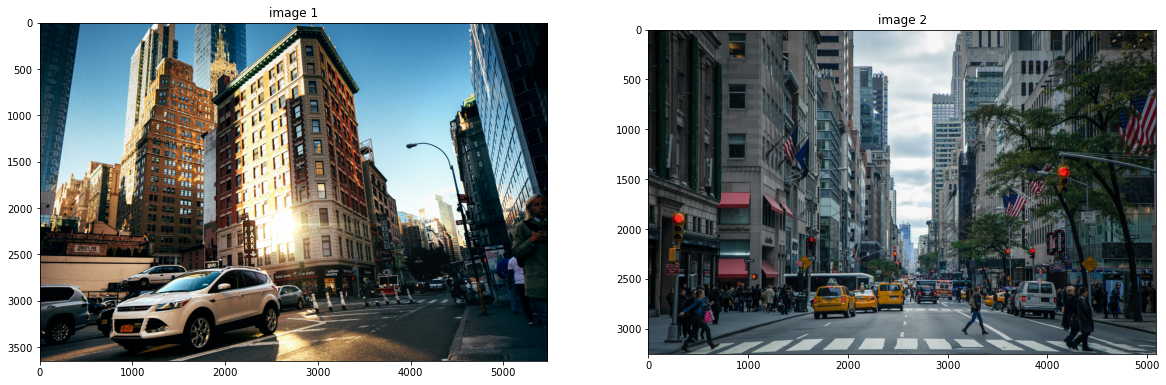

In [6]:
# Display the original image and edges
fig, ax = plt.subplots(1, 2, figsize=(20, 15))

ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[0].set_title('image 1')

ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[1].set_title('image 2')

plt.show()

In [7]:
def compress_image(image, block_size, quantization_matrix):
    height, width, channels = image.shape
    compressed_blocks = []
    
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = image[i:i+block_size, j:j+block_size, :]
            block = block.astype(np.float32)
            
            # Step 2: Discrete Cosine Transform (DCT)
            dct_block = np.zeros_like(block)
            for c in range(channels):
                dct_block[:, :, c] = cv2.dct(block[:, :, c])
            
            # Step 3: Quantization of Coefficients
            quantized_block = np.round(dct_block / quantization_matrix[..., np.newaxis])
            
            # Step 4: Zigzag Scanning of Coefficients
            flattened_block = quantized_block.flatten()
            zigzag_block = np.zeros_like(flattened_block)
            zigzag_block[0] = flattened_block[0]
            sign = 1
            for k in range(1, len(flattened_block)):
                if sign == 1:
                    zigzag_block[k] = flattened_block[k]
                else:
                    zigzag_block[k] = -flattened_block[k]
                sign = -sign
            
            # Step 5: Entropy Coding
            compressed_blocks.append(zigzag_block)
    
    return compressed_blocks


In [9]:
def sizeMB(image):
     return sys.getsizeof(image)/(1024 * 1024)

In [10]:
#Standard for JPEG
quantization_matrix = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                               [12, 12, 14, 19, 26, 58, 60, 55],
                               [14, 13, 16, 24, 40, 57, 69, 56],
                               [14, 17, 22, 29, 51, 87, 80, 62],
                               [18, 22, 37, 56, 68, 109, 103, 77],
                               [24, 35, 55, 64, 81, 104, 113, 92],
                               [49, 64, 78, 87, 103, 121, 120, 101],
                               [72, 92, 95, 98, 112, 100, 103, 99]])

In [11]:
def resize_image_to_match(image, target_image):
    target_height, target_width = target_image.shape[:2]
    resized_image = cv2.resize(image, (target_width, target_height))
    return resized_image

In [12]:
img2 = resize_image_to_match(img2, img1)

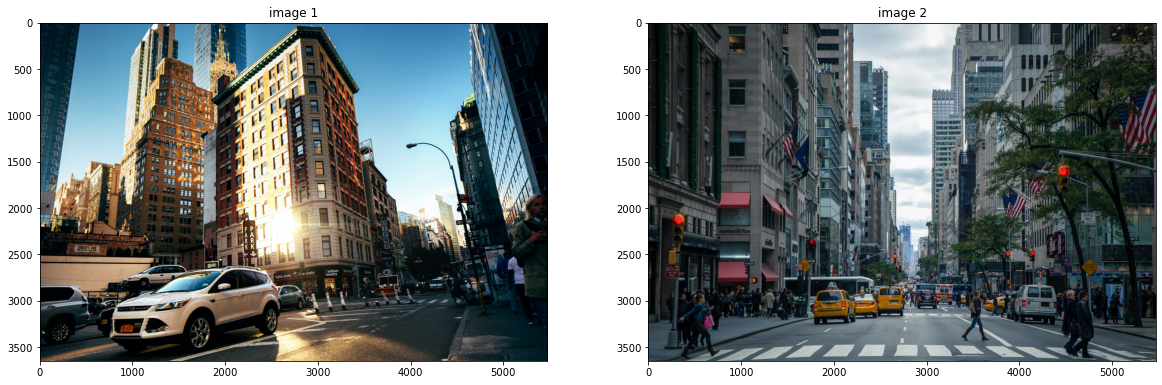

In [13]:
# Display the original image and edges
fig, ax = plt.subplots(1, 2, figsize=(20, 15))

ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[0].set_title('image 1')

ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[1].set_title('image 2')

plt.show()

In [14]:
img1_compressed8 = compress_image(img1, 8, quantization_matrix)
img2_compressed8 = compress_image(img2, 8, quantization_matrix)

In [15]:
print(f"Size of compressed_img1: {sizeMB(img1_compressed8):.2f} MB")
print(f"Size of original img1: {sizeMB(img1):.2f} MB")

Size of compressed_img1: 2.48 MB
Size of original img1: 57.11 MB
